LOADING AND CHECKING THE DATA

In [3]:
import pandas as pd

# Loaded both the datasets
train_data = pd.read_excel('/content/train_data.xlsx')
test_data = pd.read_excel('/content/test_data.xlsx')

In [4]:
#Performed basic tasks
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (113705, 17)
Test Data Shape: (8455, 17)


The above step gave the dimensions of the data i.e rows and columns

In [5]:
print(train_data.head())

   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Indivi

The above step gave me first 5 rows for all columns. Performed it to get an insight on the data



---



**NOW WE CHECK IF OUR DATA IS CORRECT ACCORDING TO OUR COLUMNS**

In [6]:
print(train_data.isnull().sum()) #In this step we checked for null values for each column and we got the output as 0 so there were no null values present

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [7]:
print(train_data.dtypes) #checked whether all the data is in proper data type as transaction date should be in date time format

customer_id                     int64
transaction_date       datetime64[ns]
sub_grade                      object
term                           object
home_ownership                 object
cibil_score                     int64
total_no_of_acc                 int64
annual_inc                    float64
int_rate                      float64
purpose                        object
loan_amnt                       int64
application_type               object
installment                   float64
verification_status            object
account_bal                     int64
emp_length                      int64
loan_status                     int64
dtype: object


In [12]:
train_data['int_rate'] = pd.to_numeric(train_data['int_rate'], errors='coerce') #RATE SHOULD BE NUMERIC


In [13]:
invalid_scores = train_data[(train_data['cibil_score'] < 300) | (train_data['cibil_score'] > 900)]
print(invalid_scores) #The maximum possible cibil score is 900 nd minimum is 300 so we make sure that all rows are in this range

Empty DataFrame
Columns: [customer_id, transaction_date, sub_grade, term, home_ownership, cibil_score, total_no_of_acc, annual_inc, int_rate, purpose, loan_amnt, application_type, installment, verification_status, account_bal, emp_length, loan_status]
Index: []


In [15]:
print(train_data['home_ownership'].unique()) #cHECK IF ANY DATA IS OUT OF THE EXPECTED 3 OPTIONS

['MORTGAGE' 'OWN' 'RENT']




---



**PERFORMING EDA**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  #IMPORTING LIBRARIES

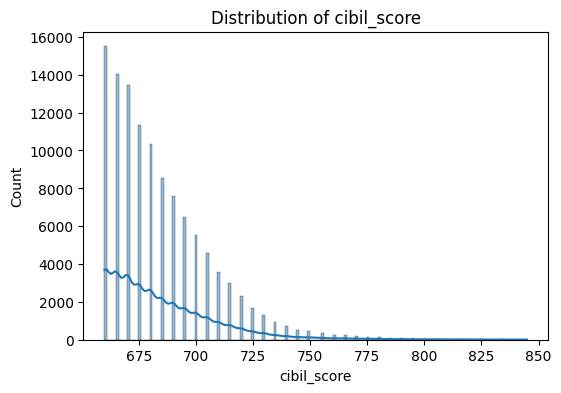

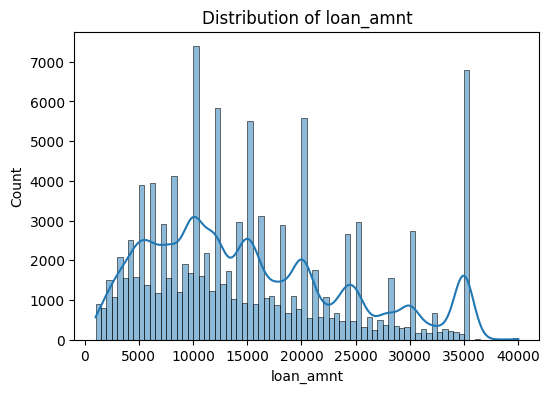

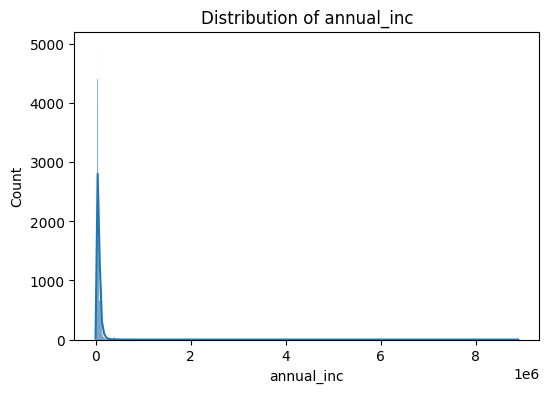

In [18]:
num_cols = ['cibil_score', 'loan_amnt', 'annual_inc']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

IN THE ABOVE OUTPUTS WE PLOTS HISTOGRAMS OF 3 COLUMNS TO UNDRSTAND THEIR TRENDS
1. THE FIRST HISTOGRAM SUGGESTS THAT MOST CIBIL SCORES SEEM TO BE AROUND 675-725 (MODERATE)
THE FREQUENCY DECREASES AS SCORES GO BEYOND 750
2. THE NEXT ON SUGGESTS THAT LOAN AMOUNTS ARE MAXIMUM BETWEEN 5000 TO 15000 WITH SPIKES AT SPECIFIC VALUES - 10000, 20000, 30000
3. THE ANNUAL INCOME RANGES FROM 0 TO 4000000. MOST INCOMES ARE SATURATED AT LOW VALUES AN THERE ARE OME VALUES WITH EXTREMELY HIGH INCOMES

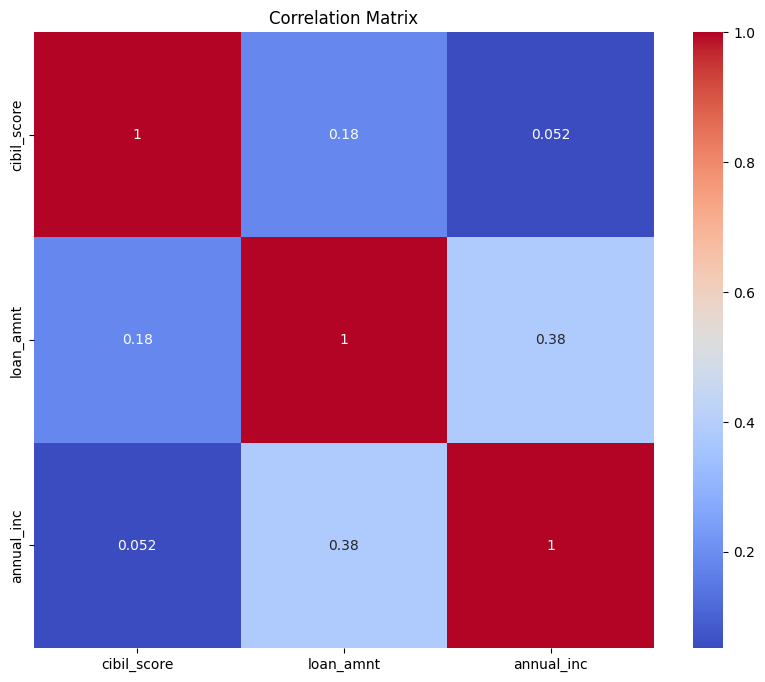

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

THE CORRELATION MATRIX HELPS IN DETERMINING THE CORRELATIO BETWEEN COLUMNS
THE STRONGEST RELATIONSHIP IS BETWEEN LOANS AMOUNT AND ANNUAL INCOME (red) INICATING ANNUAL INCOME IS PARTIAL PREDICTOR OF LOAN AMOUNT
CIBIL SCORE HAS WEKA RELATIONS WITH BOTH (blue)

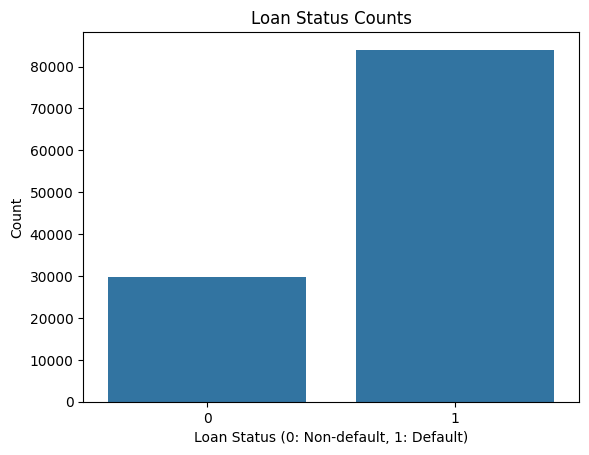

In [20]:
# Default vs. Non-default count
sns.countplot(x='loan_status', data=train_data)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status (0: Non-default, 1: Default)')
plt.ylabel('Count')
plt.show()


Suggests that there were many loans that were succesfully repaid (Non default)
The shorter bar indicates that there were very less un repayed loans or loans gone into defualt

THEREFORE IN THIS WE HAVE PERFORMED EDA ON OUR DATASET BY MAKING SURE THE DATA IS IN PROPER FORMAT, LOOKING FOR NULL VALUES, THEN UNDERTANDING THE PATRNS AND TRENDS IN THE DATA USING HISTOGRAMS, BAR PLOTS AND CORRELATIONS MATRICS